In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import scipy.stats as stats
%matplotlib inline

df_raw = pd.read_csv('admissions.csv')
df_raw.head()

print('How many observations are there in our dataset?')
print('There are 400 total observaions in our dataset')
print('------------------------------------------------')

print('Create a summary table')
print('Summary table of Admissions, GRE, GPA, and undergraduate school prestige')
print(df_raw.describe())
print('------------------------------------------------')


How many observations are there in our dataset?
There are 400 total observaions in our dataset
------------------------------------------------
Create a summary table
Summary table of Admissions, GRE, GPA, and undergraduate school prestige
            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000         NaN        NaN         NaN
50%      0.000000         NaN        NaN         NaN
75%      1.000000         NaN        NaN         NaN
max      1.000000  800.000000    4.00000    4.000000
------------------------------------------------


/Users/pt/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


In [2]:


print('Why would GRE have a larger STD than GPA?')
print('GRE has a larger STD than GPA due to the range of the values. The GRE range is 580, whereas the GPA range is 1.74. A single STD unit from the GRE mean is much larger than a single STD unit from the GPA mean.')
print('------------------------------------------------')


print('Question 4. Drop data points with missing data')
df = df_raw[:].dropna()
print(df.describe())
print('------------------------------------------------')


Why would GRE have a larger STD than GPA?
GRE has a larger STD than GPA due to the range of the values. The GRE range is 580, whereas the GPA range is 1.74. A single STD unit from the GRE mean is much larger than a single STD unit from the GPA mean.
------------------------------------------------
Question 4. Drop data points with missing data
            admit         gre         gpa    prestige
count  397.000000  397.000000  397.000000  397.000000
mean     0.317380  587.858942    3.392242    2.488665
std      0.466044  115.717787    0.380208    0.947083
min      0.000000  220.000000    2.260000    1.000000
25%      0.000000  520.000000    3.130000    2.000000
50%      0.000000  580.000000    3.400000    2.000000
75%      1.000000  660.000000    3.670000    3.000000
max      1.000000  800.000000    4.000000    4.000000
------------------------------------------------


In [3]:

print('Question 5. Confirm that you dropped the correct data. How can you tell?')
print('You can tell that all the NAN data has been dropped by reviewing the count data. The data was previously not uniform across the different columns. Following the execution of dropna(), we now see that the total count for each variable is the same, meaning all the NAN figures have been dropped.')
print('------------------------------------------------')



Question 5. Confirm that you dropped the correct data. How can you tell?
You can tell that all the NAN data has been dropped by reviewing the count data. The data was previously not uniform across the different columns. Following the execution of dropna(), we now see that the total count for each variable is the same, meaning all the NAN figures have been dropped.
------------------------------------------------


>**Comments**: you could also, to be more rigorous, explicitly count the number of missing values in each column using df.isnull().sum()

Question 6. Create box plots for GRE and GPA


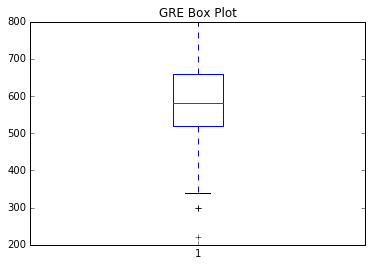

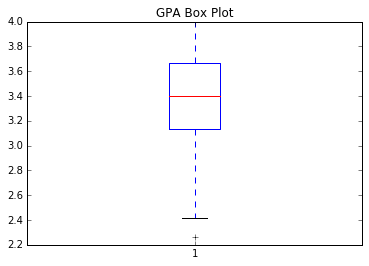

------------------------------------------------
Question 7. What do these plots show?
These plots show: median, interquartile range, max / min, outliers
------------------------------------------------


In [4]:
print('Question 6. Create box plots for GRE and GPA')

plt.title('GRE Box Plot')
plt.boxplot(df['gre'])
plt.show()

plt.title('GPA Box Plot')
plt.boxplot(df['gpa'])
plt.show()
print('------------------------------------------------')

print('Question 7. What do these plots show?')
print('These plots show: median, interquartile range, max / min, outliers')
print('------------------------------------------------')



Question 8. Describe each distribution
            admit         gre         gpa    prestige
count  397.000000  397.000000  397.000000  397.000000
mean     0.317380  587.858942    3.392242    2.488665
std      0.466044  115.717787    0.380208    0.947083
min      0.000000  220.000000    2.260000    1.000000
25%      0.000000  520.000000    3.130000    2.000000
50%      0.000000  580.000000    3.400000    2.000000
75%      1.000000  660.000000    3.670000    3.000000
max      1.000000  800.000000    4.000000    4.000000
('The distribution of the variable', 'admit', 'is:', 0.7876691478505351)
('The kurtosis of the variable', 'admit', 'is:', -1.3865881769308692)

('The distribution of the variable', 'gre', 'is:', -0.146046988215597)
('The kurtosis of the variable', 'gre', 'is:', -0.33286435465143427)

('The distribution of the variable', 'gpa', 'is:', -0.21688893296924305)
('The kurtosis of the variable', 'gpa', 'is:', -0.56356989952216807)

('The distribution of the variable', 'prestige'

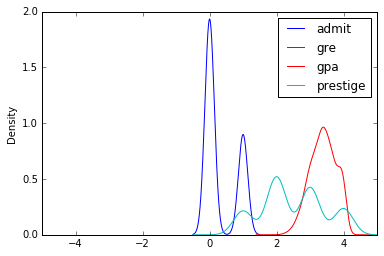

In [5]:
print('Question 8. Describe each distribution')
print(df.describe())
for i in df:
	print('The distribution of the variable',i,'is:',df[i].skew())
	print('The kurtosis of the variable',i,'is:',df[i].kurt())
	print('')

df.plot(kind='density', xlim=(-5,5))
#plt.show()

print('------------------------------------------------')



In [6]:
print('Question 9. If our model had an assumption of a normal distribution would we meet that requirement?')
print('No, by looking at the skewness, kurtosis, and the graphical representation, we can see that the dataset is not normalized, thus any insights from the analysis may not be able to be reproduced in another study')
print('------------------------------------------------')


print('Question 10. Does this distribution need correction? If so, why? How?')
print('There are two ways to correct the dataset and obtain a normalized dataset. We can either reduce the STD or increase the sample size. Reducing the STD would entail a dataset that is closer to the mean. Additionally, to increase the sampe size we would need a dataset larger than 397 observations to analyze.')
print('------------------------------------------------')



Question 9. If our model had an assumption of a normal distribution would we meet that requirement?
No, by looking at the skewness, kurtosis, and the graphical representation, we can see that the dataset is not normalized, thus any insights from the analysis may not be able to be reproduced in another study
------------------------------------------------
Question 10. Does this distribution need correction? If so, why? How?
There are two ways to correct the dataset and obtain a normalized dataset. We can either reduce the STD or increase the sample size. Reducing the STD would entail a dataset that is closer to the mean. Additionally, to increase the sampe size we would need a dataset larger than 397 observations to analyze.
------------------------------------------------


>**Comments:** re question 9, I think I know what you're getting at with the last sentence. I would phrase it a little differently: if we're assuming that the distributions are normal, and this assumption underpins a lot of our statistical methods (like, say, regression), if they are not actually normal, we can't be confident that are findings are good. <br>
Re question 10, how would you go about reducing the st dev?  Also, let's say that our sample of 397 complete obvserations is a perfectly obtained random sample.  Would collecting more data necessarily correct the skew?  

In [7]:
print('Question 11. Which of our variables are potentially colinear')
print(df.corr())
print('Two potentially colinear pairings would be a positive correlation between GRE and GPA and a negative correlation between undergrade presitge and graduate school admission')
print('------------------------------------------------')

print('Question 12. What did you find')
print('There was not any relationship that was particularlly strong. There may be additional variables that we are not considering or we need to increase the sample size')
print('------------------------------------------------')



Question 11. Which of our variables are potentially colinear
             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000
Two potentially colinear pairings would be a positive correlation between GRE and GPA and a negative correlation between undergrade presitge and graduate school admission
------------------------------------------------
Question 12. What did you find
There was not any relationship that was particularlly strong. There may be additional variables that we are not considering or we need to increase the sample size
------------------------------------------------


In [8]:
print('Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.')
print("When exploring the relationship between graduate school admissions and the prestige of the applicant's undergraduate institution, first look to clean the data ensure each variable maps accordingly and there are no NAN values. Once the data has been cleaned, determine each variable's distribution and kurtosis. Analyzing datasets that are not normal may yield inaccurate results. To account for a non-normal distribution, run additional tests which permissible to analyze a non-normally distributed dataset. Once these tests have been run, look at the strength of the association between the two variables in scope (admission and undergrad prestige). If there is a strong relationship and the results are statistically significant we should be able to assert that undergrad prestige is a predictor for graduate school admissions. If there is a weak relationship and/or the analysis is not statistically significant, re-examine the variables and looks to see if there may be any additional factors affecting the covariate, such as how is prestige determined and categorized.")
print('------------------------------------------------')

print('Question 14. What is your hypothesis')
print('My hypothesis is that the longer an individual is out of undergradate school, and the longer they are at the same company the more likely they will be to be admitted')
print('------------------------------------------------')




print('Bonus/Advanced')
print('1. Bonus: Explore alternatives to dropping obervations with missing data')
print('2. Bonus: Log transform the skewed data')
print('3. Advanced: Impute missing data')

Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.
When exploring the relationship between graduate school admissions and the prestige of the applicant's undergraduate institution, first look to clean the data ensure each variable maps accordingly and there are no NAN values. Once the data has been cleaned, determine each variable's distribution and kurtosis. Analyzing datasets that are not normal may yield inaccurate results. To account for a non-normal distribution, run additional tests which permissible to analyze a non-normally distributed dataset. Once these tests have been run, look at the strength of the association between the two variables in scope (admission and undergrad prestige). If there is a strong relationship and the results are statistically significant we should be able to assert that undergrad prestige is a predictor for graduate school admissions. If there is a weak relations

>**Comments:** great answer for question 13.  Thorough, and nicely explained.  I like your answer for question 14, but probably out of scope for the data we have!

## Feedback
Nice work!


| Requirements | Incomplete (0) | Does Not Meet Expectations (1) | Meets Expectations (2) | Exceeds Expectations (3) |
|---|---|---|---|---|
| Read in your dataset, determine how many samples are present, and ID any missing data | | |X | |
| Create a table of descriptive statistics for each of the variables (n, mean, median, standard deviation) | | |X | |
| Describe the distributions of your data | | | X| |
| Plot box plots for each variable | | | X| |
| Create a covariance matrix | | |X | |
| Determine any issues or limitations, based on your exploratory analysis | | | X| |
| Outline exploratory analysis methods | | | X| |